<h2>Data Integration</h2>

<h3>Imports<h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import seaborn as sns
from pathlib import Path
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import sompy
from sompy.sompy import SOMFactory
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


<p>Reading the document<p>

In [2]:
#Open Excel files with different extensions
filename = 'train.csv'
file_path = Path(filename)
file_extension = file_path.suffix.lower()[1:]

if file_extension == 'xlsx':
    d = pd.read_excel(file_path, engine='openpyxl')
    data = d.copy()
elif file_extension == 'xls':
    d = pd.read_excel(file_path)
    data = d.copy()
elif file_extension == 'csv':
    d = pd.read_csv(file_path, delimiter=";")
    data = d.copy()
else:
    raise Exception("File not supported")


<h2>Data Access, Exploration and Understanding</h2>

In [3]:
data.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

In [5]:
data.shape

(15589, 22)

<h4>Looking for Null Values<h4>

<p> By summing the null values for each attribute and then dividing them by the total of values of the same attribute, we will obtain the percentage of null values that each column has. A value different from 0 means that the column has 1 or more missing values, which is not desired. </p>

In [6]:
data.isna().sum()/len(data)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

<h4>Checking for duplicate values</h4>

In [7]:
data.duplicated().sum()

0

<p> We conclude that there are no duplicates in our dataset. Hence, no measures have to be taken into action. </p>

<h4> Finding outliers in Year_Birth </h4>

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.

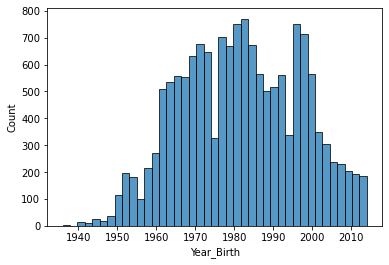

In [8]:
sns.histplot(data=data, x='Year_Birth')

No outliers found.

<h2>Data Preprocessing</h2>

<h4> Power Transformation for Reward Points <h4>

<p>We will now apply a power transformation to make data more Gaussian-like.</p>

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

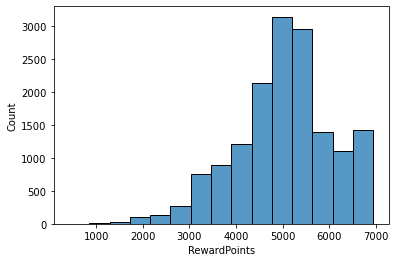

In [9]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

In [10]:
#pt = PowerTransformer(method='yeo-johnson', standardize=True)
#pt.fit(data["RewardPoints"].values.reshape(-1, 1))
#print(pt.lambdas_)
#data['RewardPoints'] = pt.transform(data["RewardPoints"].values.reshape(-1, 1))

In [11]:
#sns.histplot(data=data, x='RewardPoints', bins = 15)

<h4>Using KNN imputer for the missing values in Year_Birth <h4>

In [12]:
# creating an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(data['Year_Birth'].values.reshape(-1, 1))
data['Year_Birth'] = imputer.transform(data['Year_Birth'].values.reshape(-1, 1))



In [13]:
data.isna().sum()

Cust_ID              0
Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

<p> As demonstrated above, our data frame no longer has missing values. They have been imputed as the means of k-Nearest Neighbor values. </p>

<h4>Transform Year_Birth to age</h4>

We will now transform the variable Year_Birth to age. We will not use this new variable in our models, but it will be useful in order to better undestand the charactheristics of the population we are dealing with.

In [14]:
today = date.today()

age = today.year - data['Year_Birth']
print(age)

0        48.0
1        57.0
2        49.0
3        29.0
4        33.0
         ... 
15584    34.0
15585    22.0
15586    58.0
15587    30.0
15588    39.0
Name: Year_Birth, Length: 15589, dtype: float64


Text(0.5, 0, 'Age')

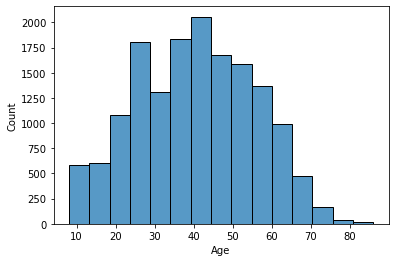

In [15]:
AgePlot = sns.histplot(data=age, x=age, bins = 15)
AgePlot.set_xlabel("Age")

In [16]:
age.mean()

40.293555930882114

We can conclude that the average age of the people in our dataset is around 40 years old. We will now plot the relation between TypeTravel and Year_Birth to check if there are any outliers in that.

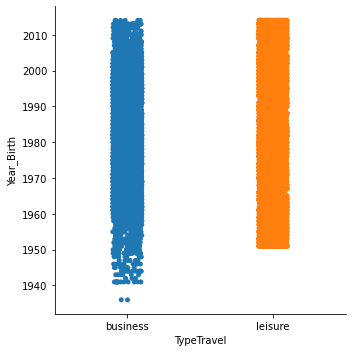

In [17]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

It appears that there are two isolated dots from very old people who are still going on business trips. We will consider these outliers and therefore remove them.

In [18]:
data.drop(data[(data['Year_Birth'] < 1937) & (data['TypeTravel'] == "business")].index, inplace = True)

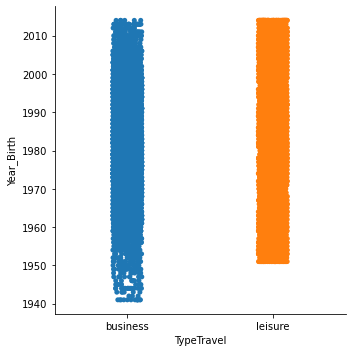

In [19]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

<h3>Transform Name in gender </h3>

Since "Name" is not a useful variable for our models, we will transform it to gender. This new variable gives us much better information.

In [20]:
gender = []
for i in data["Name"]:
    if i[:2] == "Mr":
        gender.append(1)
    else:
        gender.append(0)
        i
data["Name"] = gender
data = data.rename(columns = {"Name":"Male"})


<h4>Change Data types</h4>

Replacing the data from longevity to 1 and 0
Yes=1 No=0

In [21]:
data['Longevity'].value_counts()

yes    12546
no      2874
y        167
Name: Longevity, dtype: int64

In [22]:
data['Longevity'].replace(to_replace = 'yes',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'y',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'no',value = 0, inplace = True)
data['Longevity'].value_counts()

1    12713
0     2874
Name: Longevity, dtype: int64

<h4>Changing the Values of Column "TypeTravel"</h4>

<p>business = 1 leisure = 0 </p>

In [23]:
data['TypeTravel'].value_counts()

business    10754
leisure      4833
Name: TypeTravel, dtype: int64

In [24]:
data['TypeTravel'].replace(to_replace = 'business',value = 1, inplace = True)
data['TypeTravel'].replace(to_replace = 'leisure',value = 0, inplace = True)
data['TypeTravel'].value_counts()

1    10754
0     4833
Name: TypeTravel, dtype: int64

<h4>Changing the Values of Column "Wifi"</h4>

<p>6 were Replaced by 5 </p>

<AxesSubplot:xlabel='Wifi'>

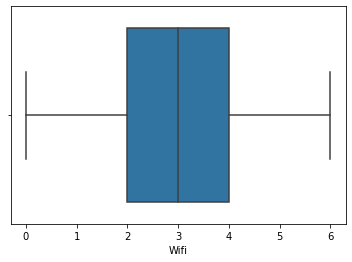

In [25]:
sns.boxplot(x="Wifi", data = data[['Wifi']])

Since the data range goes from 0 to 5, it doesn't make sense to have Wifi evaluated as a 6.

In [26]:
data['Wifi'].value_counts()

4    3704
5    3446
3    3346
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [27]:
data['Wifi'].replace(to_replace = 6,value = 5, inplace = True)
data['Wifi'].value_counts()

4    3704
5    3482
3    3346
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

In [28]:
data['Wifi'].max()

5

Now Wifi is evaluated from 0 to 5, like all the other variables.

<h4>Changing the Values of Column "Churn"</h4>

<p>convert "churn" and "nochurn" to 1 (True) and 0 (False) </p>

In [29]:
data['Churn'].value_counts()

nochurn    8477
churn      7110
Name: Churn, dtype: int64

In [30]:
data['Churn'].replace(to_replace = 'churn',value = 1, inplace = True)
data['Churn'].replace(to_replace = 'nochurn',value = 0, inplace = True)
data['Churn'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15587 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15587 non-null  int64  
 1   Churn              15587 non-null  int64  
 2   Male               15587 non-null  int64  
 3   Longevity          15587 non-null  int64  
 4   Year_Birth         15587 non-null  float64
 5   TypeTravel         15587 non-null  int64  
 6   RoomType           15587 non-null  object 
 7   RewardPoints       15587 non-null  int64  
 8   Comfort            15587 non-null  int64  
 9   ReceptionSchedule  15587 non-null  int64  
 10  FoodDrink          15587 non-null  int64  
 11  Location           15587 non-null  int64  
 12  Wifi               15587 non-null  int64  
 13  Amenities          15587 non-null  int64  
 14  Staff              15587 non-null  int64  
 15  OnlineBooking      15587 non-null  int64  
 16  PriceQuality       155

Changing the type of Year_Birth to int32

<p>After applying the power transformation to Year_Birth, some years became non-integer values. Since this does not make sense, we changed the type of this variable to int in order to round those values. </p>

In [31]:
data['Year_Birth']=data['Year_Birth'].astype(int)
data.head(4)

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,1,0,1,1974,1,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,0,1,1,1965,1,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,1,1,1,1973,1,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,0,0,1,1993,0,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3


<h4>Room Type change</h4>

In [32]:
data['RoomType'].value_counts()

single    7440
double    7021
suite     1126
Name: RoomType, dtype: int64

<h4>Ordinal Encoding for column RoomType</h4>

In [33]:
data['RoomType'].replace(to_replace = 'suite',value = 2, inplace = True)
data['RoomType'].replace(to_replace = 'double',value = 1, inplace = True)
data['RoomType'].replace(to_replace = 'single',value = 0, inplace = True)
data['RoomType'].value_counts()

0    7440
1    7021
2    1126
Name: RoomType, dtype: int64

<h4>Pearson Correlation Heatmap</h4>

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001F5CB4109D0>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001F5CB4109D0> on colorbar
Setting pcolormesh


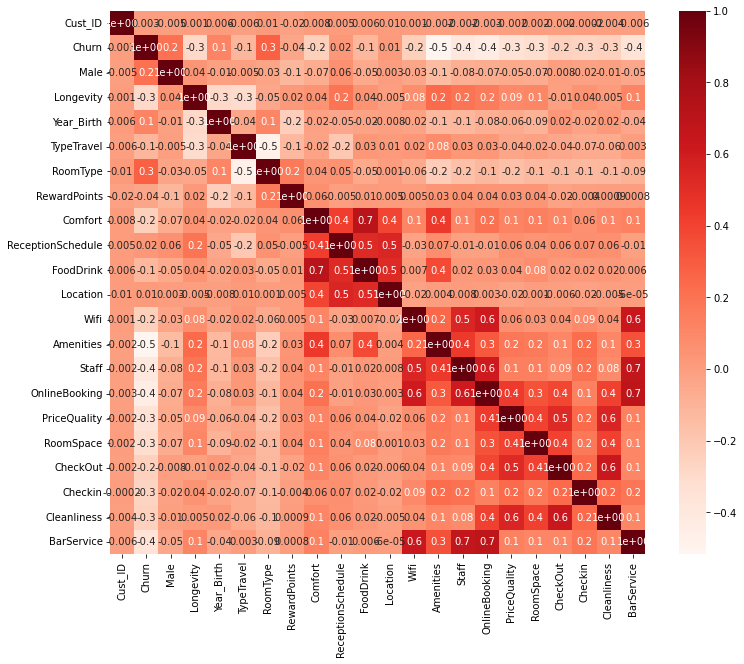

In [34]:
#Pearson correlation
cor_pearson= data.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

<h4>Feature Selection</h4>

<p>With the correlation map we were able see which features had a greater correlation between them. </p>

In [35]:
unscaled_data = data.copy()

In [36]:
data.drop(columns=['Cust_ID'], inplace=True)

<h4>Scaling<h4>

<p>Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.</p>

In [37]:
scaler = RobustScaler().fit(data)
robust_data = scaler.transform(data)

data = pd.DataFrame(robust_data, columns = data.columns)
data.head()

,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1.0,0.0,0.0,-0.291667,0.0,-1.0,-0.150457,0.0,0.5,-1.0,...,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,0.0,1.0,0.0,-0.666667,0.0,-1.0,1.359933,-1.0,-1.0,-1.0,...,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,1.0,1.0,0.0,-0.333333,0.0,-1.0,-0.600998,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,0.0,0.0,0.0,0.500000,-1.0,0.0,-1.029925,-1.0,-1.0,-1.0,...,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.333333,0.0,-1.0,0.239401,-0.5,-0.5,0.0,...,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0


<h4>PCA</h4>

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.

In [ ]:
#pca = PCA().fit(data)
#data_PCA = pca.transform(data)

#data = pd.DataFrame(data_PCA, columns = data.columns)
#data.head()

We ended up not using PCA because we felt that the trade-off between more simplicity but less accuracy was not worth it. The data is simple enough to the point where we ca analyse it without the need for dimensionality reduction. 

<h4> Perspectives </h4>

In [38]:
data_satisfaction = data[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333333,0.0,0.333333,-1.5,0.0,0.0,0.0
15583,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333333,-1.0,-1.000000,-0.5,1.0,0.0,1.0
15584,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5
15585,0.5,0.0,0.5,0.5,1.0,0.0,0.5,0.333333,-2.0,0.333333,0.0,0.0,0.0,1.0


In [39]:
data_customer = data[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].copy()
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn
0,0.0,0.0,-0.291667,0.0,-0.150457,-1.0,1.0
1,1.0,0.0,-0.666667,0.0,1.359933,-1.0,0.0
2,1.0,0.0,-0.333333,0.0,-0.600998,-1.0,1.0
3,0.0,0.0,0.500000,-1.0,-1.029925,0.0,0.0
4,1.0,0.0,0.333333,0.0,0.239401,-1.0,0.0
...,...,...,...,...,...,...,...
15582,0.0,-1.0,0.291667,0.0,-0.099751,0.0,1.0
15583,0.0,-1.0,0.791667,0.0,-0.098088,0.0,1.0
15584,1.0,0.0,-0.708333,0.0,-0.866168,-1.0,0.0
15585,1.0,0.0,0.458333,-1.0,0.055694,0.0,0.0


<h3>Modelling</h3>

<h4>K-Means</h4>

<h4> Elbow Method for satisfaction perspective</h4>

In [40]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(data_satisfaction)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

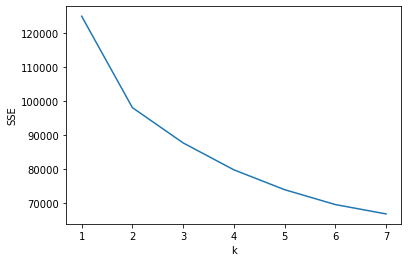

In [41]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)
# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

<h4> Elbow Method for customer perspective</h4>

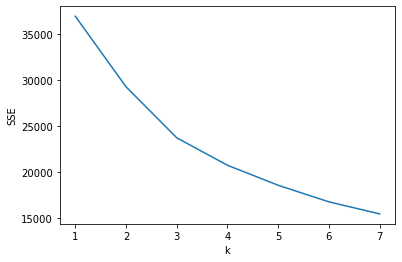

In [42]:
ks = range(1, 8)
inertias = []

for k in ks:
    
    model = KMeans(n_clusters=k)

    
    model.fit(data_customer)

    
    inertias.append(model.inertia_)


plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

<h4>Dendogram for customer perspective</h4>

In [43]:
#hclustering = linkage(data_customer, 'complete') 
#hclustering = linkage(data_customer, 'average')
#hclustering = linkage(data_customer, 'single')
hclustering = linkage(data_customer, 'ward')

In [ ]:
# define the title of the plot
#plt.title('Hierarchical Clustering Dendrogram (truncated) - Customer Perspective')
# define the label for x axis
#plt.xlabel('Observations')
# define the label for y axis
#plt.ylabel('Distance')

# Draw the dendogram
#dendrogram(
#    hclustering,
#    truncate_mode='lastp',  # truncation is used to condense the dendrogram
#    p=12,                   # p parameter for truncate_mode
#    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
#    leaf_rotation=90.,
#    leaf_font_size=12.,
#    show_contracted=True, 
#)
#plt.show()

<h4>Dendogram for satisfaction perspective</h4>

In [ ]:
#hclustering = linkage(data_satisfaction, 'ward')

#plt.title('Hierarchical Clustering Dendrogram (truncated) - Satisfaction Perspective')
#plt.xlabel('Observations')
#plt.ylabel('Distance')

#dendrogram(
#    hclustering,
#    truncate_mode='lastp',  # truncation is used to condense the dendrogram
#    p=12,                   # p parameter for truncate_mode
#    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
#    leaf_rotation=90.,
#    leaf_font_size=12.,
#    show_contracted=True, 
#)
#plt.show()

<h4> Applying K-Means </h4>

In [44]:
model_KMeans_satisfaction = KMeans(n_clusters=2)

model_KMeans_satisfaction.fit(data_satisfaction)

KMeans(n_clusters=2)

In [45]:
model_KMeans_customer = KMeans(n_clusters=4)

model_KMeans_customer.fit(data_customer)

KMeans(n_clusters=4)

In [46]:
model_KMeans_satisfaction.cluster_centers_

array([[-0.24055416, -0.11437343, -0.16703401, -0.01306675, -0.04069584,
        -0.58328086, -0.49685139, -0.42144207, -1.60941436, -0.37657431,
        -0.51322418, -0.52660579, -0.52337846, -0.06297229],
       [ 0.03178127,  0.07639415, -0.01624256, -0.00276123,  0.23291825,
        -0.12636708, -0.0747699 , -0.01718101,  0.19523552, -0.03869338,
         0.10037899,  0.91467244,  0.10054142,  0.33649161]])

In [47]:
model_KMeans_customer.cluster_centers_

array([[ 0.5155914 , -0.03629032, -0.01806676, -0.02930108, -1.06100519,
        -0.94112903,  0.25      ],
       [ 0.44005592, -0.93358965,  0.46777059, -0.00314575, -0.03410238,
        -0.33939182,  0.78888501],
       [ 0.61341005, -0.00221288,  0.24847865, -0.80305377, -0.10438295,
         0.16176145,  0.63089179],
       [ 0.36839759, -0.01292623, -0.43171013, -0.24203254,  0.81853571,
        -0.57343437,  0.23891241]])

In [48]:
data_satisfaction['label'] = model_KMeans_satisfaction.labels_
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,1
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,1
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,0
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.5,-1.5,-0.5,-0.5,0.0,-1.0,0.0,-0.333333,0.0,0.333333,-1.5,0.0,0.0,0.0,0
15583,0.0,0.0,0.0,0.0,1.0,-0.5,0.5,0.333333,-1.0,-1.000000,-0.5,1.0,0.0,1.0,1
15584,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,2.0,0.0,0.5,1
15585,0.5,0.0,0.5,0.5,1.0,0.0,0.5,0.333333,-2.0,0.333333,0.0,0.0,0.0,1.0,0


In [49]:
data_customer['label'] = model_KMeans_customer.labels_
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label
0,0.0,0.0,-0.291667,0.0,-0.150457,-1.0,1.0,0
1,1.0,0.0,-0.666667,0.0,1.359933,-1.0,0.0,3
2,1.0,0.0,-0.333333,0.0,-0.600998,-1.0,1.0,0
3,0.0,0.0,0.500000,-1.0,-1.029925,0.0,0.0,2
4,1.0,0.0,0.333333,0.0,0.239401,-1.0,0.0,3
...,...,...,...,...,...,...,...,...
15582,0.0,-1.0,0.291667,0.0,-0.099751,0.0,1.0,1
15583,0.0,-1.0,0.791667,0.0,-0.098088,0.0,1.0,1
15584,1.0,0.0,-0.708333,0.0,-0.866168,-1.0,0.0,0
15585,1.0,0.0,0.458333,-1.0,0.055694,0.0,0.0,2


<h2> Assessment </h2>

In [50]:
descr_satisfaction = data_satisfaction.groupby(['label']).describe().transpose()
descr_satisfaction

label                       0            1
Comfort    count  6349.000000  9238.000000
           mean     -0.240904     0.031933
           std       0.642229     0.706921
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.500000    -1.000000
           25%      -0.500000     0.000000
           50%       0.000000     0.500000
           75%       0.500000     1.000000
           max       1.000000     1.000000

[112 rows x 2 columns]

In [51]:
descr_customer = data_customer.groupby(['label']).describe().transpose()
descr_customer

label                         0            1            2            3
Male         count  3721.000000  2858.000000  4524.000000  4484.000000
             mean      0.515722     0.440168     0.612953     0.368421
             std       0.499820     0.496494     0.487128     0.482430
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     0.000000
             50%       1.000000     0.000000     1.000000     0.000000
             75%       1.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Longevity    count  3721.000000  2858.000000  4524.000000  4484.000000
             mean     -0.036281    -0.934570    -0.002210    -0.012935
             std       0.187013     0.247327     0.046968     0.113006
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000    -1.000000     0.000000     0.000000
             50%       0.000000    -1.000000     0.000000     0.000000
             75%       0.000000    -1.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000     0.000000
Year_Birth   count  3721.000000  2858.000000  4524.000000  4484.000000
             mean     -0.018006     0.467824     0.248692    -0.432259
             std       0.531741     0.413650     0.682932     0.414191
             min      -1.666667    -1.416667    -1.333333    -1.666667
             25%      -0.416667     0.166667    -0.208333    -0.708333
             50%      -0.041667     0.583333     0.291667    -0.416667
             75%       0.416667     0.750000     0.791667    -0.125000
             max       1.375000     1.375000     1.375000     0.916667
TypeTravel   count  3721.000000  2858.000000  4524.000000  4484.000000
             mean     -0.029293    -0.003149    -0.802608    -0.241748
             std       0.168650     0.056038     0.398074     0.428190
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000    -1.000000     0.000000
             50%       0.000000     0.000000    -1.000000     0.000000
             75%       0.000000     0.000000    -1.000000     0.000000
             max       0.000000     0.000000     0.000000     0.000000
RewardPoints count  3721.000000  2858.000000  4524.000000  4484.000000
             mean     -1.060753    -0.033894    -0.104083     0.818769
             std       0.656400     0.409914     0.484673     0.478775
             min      -3.889443    -1.807149    -2.071488    -0.363259
             25%      -1.493766    -0.275769    -0.380091     0.367207
             50%      -1.011638    -0.006650    -0.048213     0.903990
             75%      -0.536160     0.241064     0.230258     1.240233
             max       0.160432     0.965087     1.546966     1.547797
RoomType     count  3721.000000  2858.000000  4524.000000  4484.000000
             mean     -0.941145    -0.339398     0.161362    -0.573595
             std       0.238787     0.549536     0.428946     0.566897
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%      -1.000000    -1.000000     0.000000    -1.000000
             50%      -1.000000     0.000000     0.000000    -1.000000
             75%      -1.000000     0.000000     0.000000     0.000000
             max       1.000000     1.000000     1.000000     1.000000
Churn        count  3721.000000  2858.000000  4524.000000  4484.000000
             mean      0.250202     0.788663     0.630637     0.239072
             std       0.433187     0.408328     0.482686     0.426565
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     1.000000     0.000000     0.000000
             50%       0.000000     1.000000     1.000000     0.000000
             75%       1.000000     1.000000     1.000000     0.000000
             max       1

<h3>Visualizing the results </h3>

In [52]:
cluster0_satisfaction = data_satisfaction[data_satisfaction.label==0]
cluster1_satisfaction = data_satisfaction[data_satisfaction.label==1]

In [53]:
cluster0_customer = data_customer[data_customer.label==0]
cluster1_customer = data_customer[data_customer.label==1]
cluster2_customer = data_customer[data_customer.label==2]
cluster3_customer = data_customer[data_customer.label==3]

c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


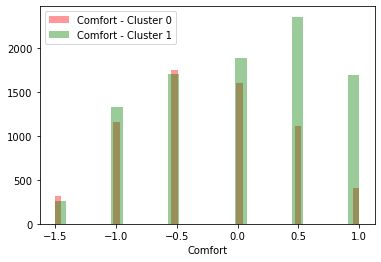

In [54]:
sns.distplot(cluster0_satisfaction['Comfort'],color='red',label='Comfort - Cluster 0', kde = False)
sns.distplot(cluster1_satisfaction['Comfort'],color='green',label='Comfort - Cluster 1', kde = False)
plt.legend()

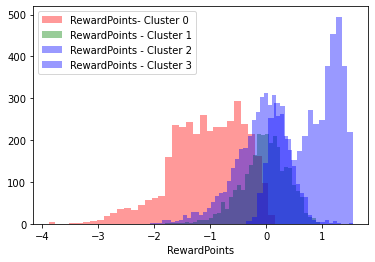

In [55]:
sns.distplot(cluster0_customer['RewardPoints'],color='red',label='RewardPoints- Cluster 0', kde = False)
sns.distplot(cluster1_customer['RewardPoints'],color='green',label='RewardPoints - Cluster 1', kde = False)
sns.distplot(cluster2_customer['RewardPoints'],color='blue',label='RewardPoints - Cluster 2', kde = False)
sns.distplot(cluster3_customer['RewardPoints'],color='blue',label='RewardPoints - Cluster 3', kde = False)
plt.legend()

<h2>SOM Data Satisfaction</h2>

In [57]:
df_som = np.float32(data_satisfaction.values)

In [58]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [59]:
som = SOMFactory().build(df_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [60]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

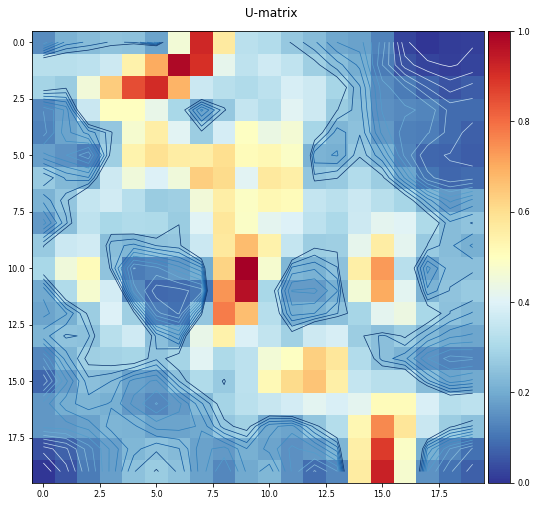

In [61]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


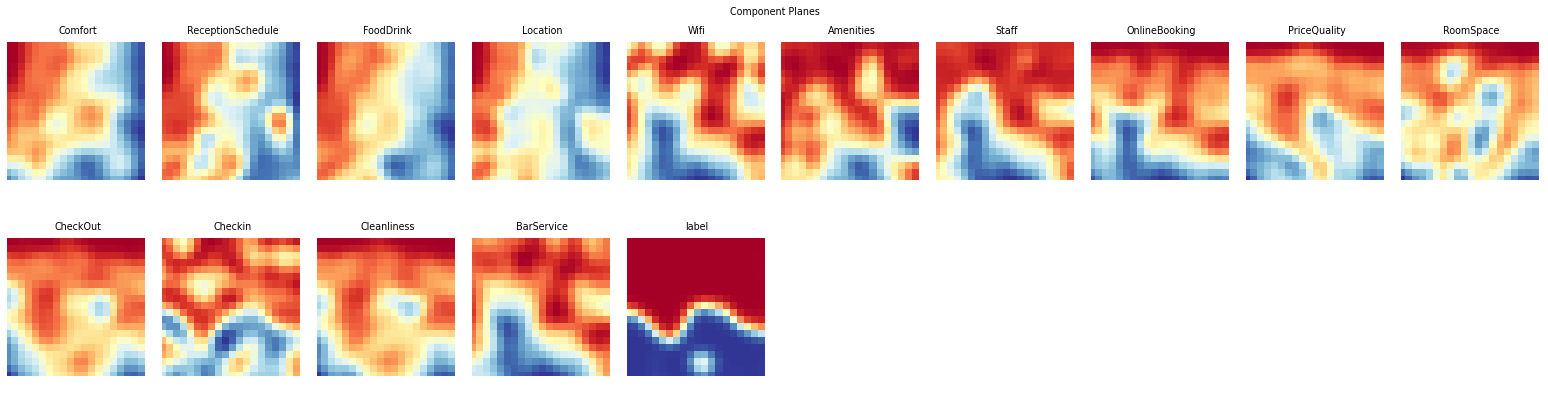

In [62]:
som.component_names = data_satisfaction.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [63]:
bmus = som.project_data(df_som)
bmus

array([151,  59, 364, ..., 139, 211, 288])

In [64]:
cl = som.cluster(n_clusters=2)

In [65]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

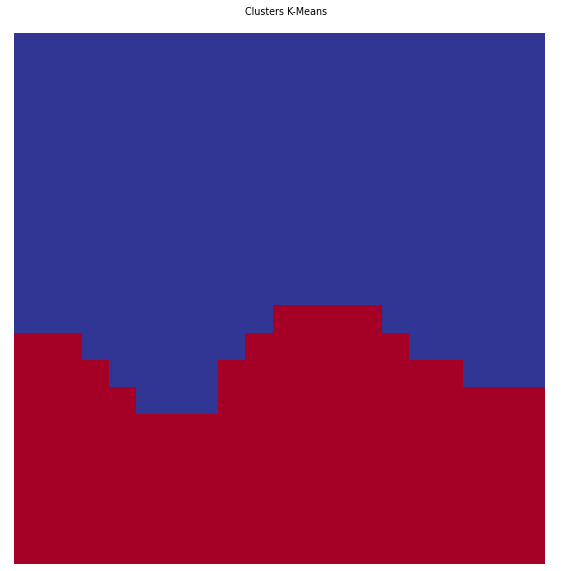

In [66]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

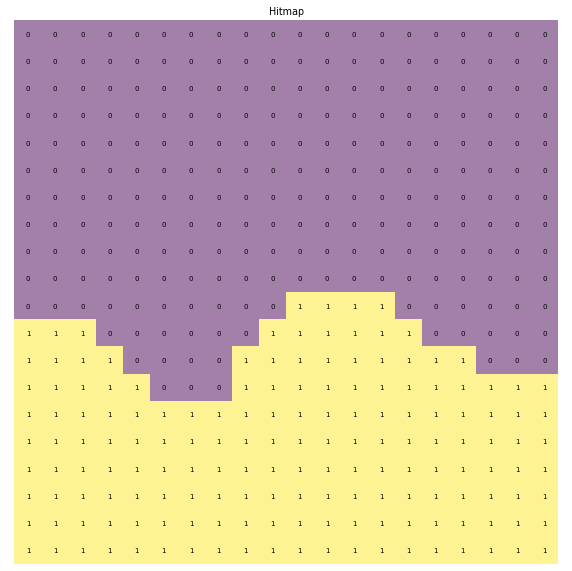

In [67]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [68]:
bmus = som.project_data(df_som)
data_satisfaction['bmu'] = bmus

In [70]:
data_satisfaction['label'] = labels[data_satisfaction['bmu']]
data_satisfaction.head()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label,bmu
0,0.0,0.5,-1.0,0.5,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5,0,151
1,-1.0,-1.0,-1.0,-1.0,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5,0,59
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0,1,364
3,-1.0,-1.0,-1.0,-1.0,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0,119
4,-0.5,-0.5,0.0,-0.5,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0,0,75


In [71]:
df_final = data.copy(deep=True)
df_final['label'] = data_satisfaction['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  9165.000000  6422.000000
           mean      0.045008    -0.256462
           std       0.701621     0.643648
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.000000    -1.500000
           25%       0.000000    -0.500000
           50%       0.500000     0.000000
           75%       1.000000     0.500000
           max       1.000000     1.000000

[112 rows x 2 columns]

<h2>SOM Data customer</h2>

In [72]:
df_som_customer = np.float32(data_customer.values)

In [73]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [74]:
som = SOMFactory().build(df_som_customer, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [75]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

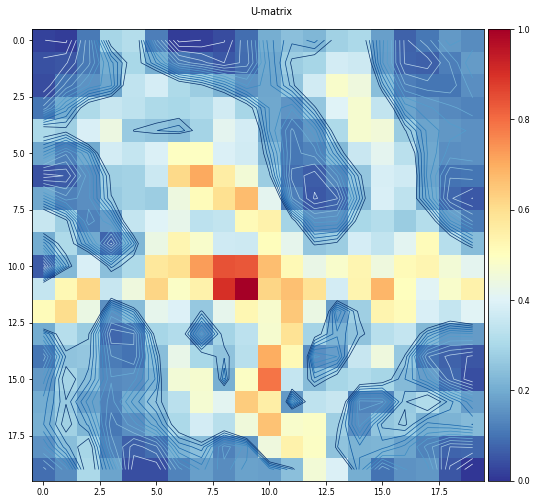

In [76]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


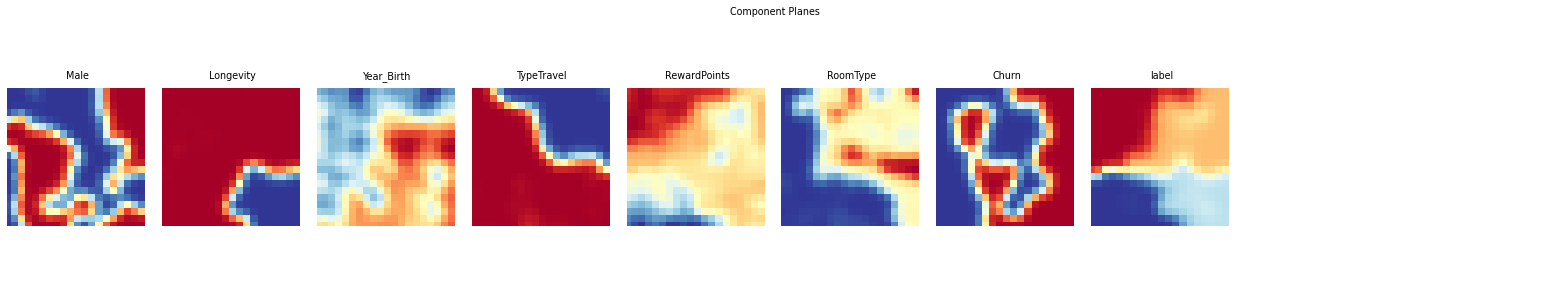

In [77]:
som.component_names = data_customer.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [78]:
bmus = som.project_data(df_som_customer)
bmus

array([289, 102, 267, ..., 243, 115, 217])

In [79]:
cl = som.cluster(n_clusters=4)

In [80]:
labels = getattr(som, 'cluster_labels')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,

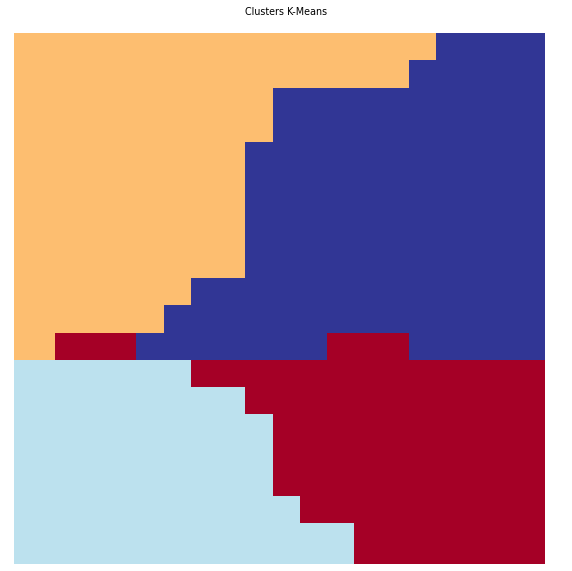

In [81]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

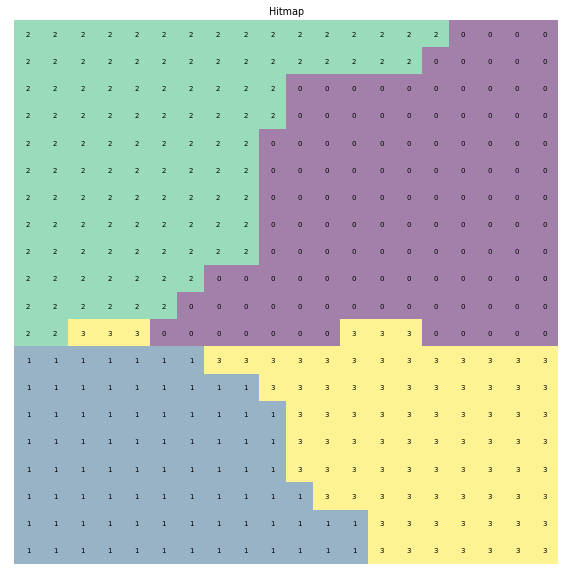

In [82]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [83]:
bmus = som.project_data(df_som_customer)
data_customer['bmu'] = bmus

In [84]:
data_customer['label'] = labels[data_customer['bmu']]
data_customer.head()

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label,bmu
0,0.0,0.0,-0.291667,0.0,-0.150457,-1.0,1.0,1,289
1,1.0,0.0,-0.666667,0.0,1.359933,-1.0,0.0,2,102
2,1.0,0.0,-0.333333,0.0,-0.600998,-1.0,1.0,1,267
3,0.0,0.0,0.500000,-1.0,-1.029925,0.0,0.0,0,113
4,1.0,0.0,0.333333,0.0,0.239401,-1.0,0.0,2,204


In [85]:
df_final = data.copy(deep=True)
df_final['label'] = data_customer['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].describe().T
descr

label                         0            1            2            3
Male         count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.621622     0.519160     0.363616     0.439934
             std       0.485037     0.499704     0.481093     0.496461
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     0.000000
             50%       1.000000     1.000000     0.000000     0.000000
             75%       1.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Longevity    count  4477.000000  3523.000000  4557.000000  3030.000000
             mean     -0.000447    -0.002838    -0.003731    -0.938944
             std       0.021134     0.053209     0.060971     0.239473
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000     0.000000    -1.000000
             50%       0.000000     0.000000     0.000000    -1.000000
             75%       0.000000     0.000000     0.000000    -1.000000
             max       0.000000     0.000000     0.000000     0.000000
Year_Birth   count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.266417    -0.023394    -0.432494     0.434791
             std       0.682031     0.527949     0.405653     0.447002
             min      -1.333333    -1.666667    -1.666667    -1.666667
             25%      -0.166667    -0.416667    -0.708333     0.166667
             50%       0.291667    -0.041667    -0.416667     0.583333
             75%       0.833333     0.416667    -0.125000     0.708333
             max       1.375000     1.375000     0.916667     1.375000
TypeTravel   count  4477.000000  3523.000000  4557.000000  3030.000000
             mean     -0.802100    -0.010502    -0.260259    -0.006271
             std       0.398461     0.101956     0.438824     0.078952
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000    -1.000000     0.000000
             50%      -1.000000     0.000000     0.000000     0.000000
             75%      -1.000000     0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000     0.000000
RewardPoints count  4477.000000  3523.000000  4557.000000  3030.000000
             mean     -0.144510    -1.043461     0.815143    -0.077546
             std       0.509732     0.665104     0.481398     0.468823
             min      -2.712386    -3.889443    -0.591854    -3.055694
             25%      -0.412303    -1.474231     0.366584    -0.320657
             50%      -0.064838    -0.991687     0.901081    -0.029510
             75%       0.207814    -0.522028     1.236908     0.229426
             max       0.985037     0.442228     1.547797     0.965087
RoomType     count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.146080    -0.961397    -0.542901    -0.365347
             std       0.423944     0.192675     0.593878     0.552482
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000    -1.000000    -1.000000    -1.000000
             50%       0.000000    -1.000000    -1.000000     0.000000
             75%       0.000000    -1.000000     0.000000     0.000000
             max       1.000000     0.000000     1.000000     1.000000
Churn        count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.619165     0.235311     0.253017     0.777558
             std       0.485646     0.424253     0.434789     0.415955
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     1.000000
             50%       1.000000     0.000000     0.000000     1.000000
             75%       1.000000     0.000000     1.000000     1.000000
             max       1

<h2>Exploring the Results </h2>

In [86]:
# add labels from satisfaction perspective
unscaled_data['label_sat'] = list(data_satisfaction['label'])
# add labels from customer value perspective
unscaled_data['label_cust'] = list(data_customer['label'])
unscaled_data.head()

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label_sat,label_cust
0,1,1,0,1,1974,1,0,4907,3,4,...,4,3,3,3,3,4,3,4,0,1
1,2,0,1,1,1965,1,0,6724,1,1,...,4,5,5,5,5,1,5,2,0,2
2,3,1,1,1,1973,1,0,4365,3,3,...,4,3,3,2,3,2,3,1,1,1
3,4,0,0,1,1993,0,1,3849,1,1,...,5,4,4,4,4,4,4,3,0,0
4,5,0,1,1,1989,1,0,5376,2,2,...,5,5,5,3,4,1,3,5,0,2


In [88]:
unscaled_data['final_label'] = unscaled_data['label_sat'].astype(str) + unscaled_data['label_cust'].astype(str)
unscaled_data.head()

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label_sat,label_cust,final_label
0,1,1,0,1,1974,1,0,4907,3,4,...,3,3,3,3,4,3,4,0,1,01
1,2,0,1,1,1965,1,0,6724,1,1,...,5,5,5,5,1,5,2,0,2,02
2,3,1,1,1,1973,1,0,4365,3,3,...,3,3,2,3,2,3,1,1,1,11
3,4,0,0,1,1993,0,1,3849,1,1,...,4,4,4,4,4,4,3,0,0,00
4,5,0,1,1,1989,1,0,5376,2,2,...,5,5,3,4,1,3,5,0,2,02


In [89]:
#'Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService'
centroids_satisfaction = model_KMeans_satisfaction.cluster_centers_

In [90]:
centroid_0_Comfort = centroids_satisfaction[0][0]
centroid_1_Comfort = centroids_satisfaction[1][0]
centroid_0_ReceptionSchedule = centroids_satisfaction[0][1]
centroid_1_ReceptionSchedule = centroids_satisfaction[1][1]
centroid_0_FoodDrink = centroids_satisfaction[0][2]
centroid_1_FoodDrink = centroids_satisfaction[1][2]
centroid_0_Location = centroids_satisfaction[0][3]
centroid_1_Location = centroids_satisfaction[1][3]
centroid_0_Wifi = centroids_satisfaction[0][4]
centroid_1_Wifi = centroids_satisfaction[1][4]
centroid_0_Amenities = centroids_satisfaction[0][5]
centroid_1_Amenities = centroids_satisfaction[1][5]
centroid_0_Staff = centroids_satisfaction[0][6]
centroid_1_Staff = centroids_satisfaction[1][6]
centroid_0_OnlineBooking = centroids_satisfaction[0][7]
centroid_1_OnlineBooking = centroids_satisfaction[1][7]
centroid_0_PriceQuality = centroids_satisfaction[0][8]
centroid_1_PriceQuality = centroids_satisfaction[1][8]
centroid_0_RoomSpace = centroids_satisfaction[0][9]
centroid_1_RoomSpace = centroids_satisfaction[1][9]
centroid_0_CheckOut = centroids_satisfaction[0][10]
centroid_1_CheckOut = centroids_satisfaction[1][10]
centroid_0_Checkin = centroids_satisfaction[0][11]
centroid_1_Checkin = centroids_satisfaction[1][11]
centroid_0_Cleanliness = centroids_satisfaction[0][12]
centroid_1_Cleanliness = centroids_satisfaction[1][12]
centroid_0_BarService = centroids_satisfaction[0][13]
centroid_1_BarService = centroids_satisfaction[1][13]

In [91]:
#'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn'
centroids_customer = model_KMeans_customer.cluster_centers_

In [92]:
centroid_0_Male = centroids_customer[0][0]
centroid_1_Male = centroids_customer[1][0]
centroid_2_Male = centroids_customer[2][0]
centroid_3_Male = centroids_customer[3][0]
centroid_0_Longevity = centroids_customer[0][1]
centroid_1_Longevity = centroids_customer[1][1]
centroid_2_Longevity = centroids_customer[2][1]
centroid_3_Longevity = centroids_customer[3][1]
centroid_0_Year_Birth = centroids_customer[0][2]
centroid_1_Year_Birth = centroids_customer[1][2]
centroid_2_Year_Birth = centroids_customer[2][2]
centroid_3_Year_Birth = centroids_customer[3][2]
centroid_0_TypeTravel = centroids_customer[0][3]
centroid_1_TypeTravel = centroids_customer[1][3]
centroid_2_TypeTravel = centroids_customer[2][3]
centroid_3_TypeTravel = centroids_customer[3][0]
centroid_0_RewardPoints = centroids_customer[0][4]
centroid_1_RewardPoints = centroids_customer[1][4]
centroid_2_RewardPoints = centroids_customer[2][4]
centroid_3_RewardPoints = centroids_customer[3][4]
centroid_0_RoomType = centroids_customer[0][5]
centroid_1_RoomType = centroids_customer[1][5]
centroid_2_RoomType = centroids_customer[2][5]
centroid_3_RoomType = centroids_customer[3][5]
centroid_0_Churn = centroids_customer[0][6]
centroid_1_Churn = centroids_customer[1][6]
centroid_2_Churn = centroids_customer[2][6]
centroid_3_Churn = centroids_customer[3][6]



<AxesSubplot:xlabel='count', ylabel='BarService'>

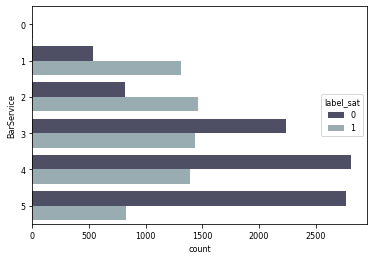

In [111]:
sns.countplot(y = 'BarService', hue = 'label_sat', data = unscaled_data, palette='bone')

<h2>Join Clusters</h2>

In [93]:
cluster00 = unscaled_data[unscaled_data.final_label=='00']
cluster01 = unscaled_data[unscaled_data.final_label=='01']
cluster02 = unscaled_data[unscaled_data.final_label=='02']
cluster03 = unscaled_data[unscaled_data.final_label=='03']
cluster10 = unscaled_data[unscaled_data.final_label=='10']
cluster11 = unscaled_data[unscaled_data.final_label=='11']
cluster12 = unscaled_data[unscaled_data.final_label=='12']
cluster13 = unscaled_data[unscaled_data.final_label=='13']



c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


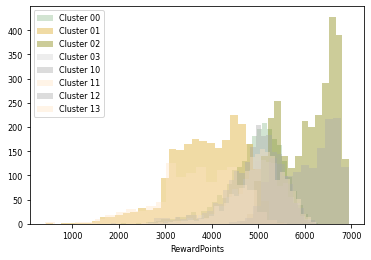

In [94]:
sns.distplot(cluster00['RewardPoints'],color='darkseagreen',label='Cluster 00', kde = False)
sns.distplot(cluster01['RewardPoints'],color='goldenrod',label='Cluster 01', kde = False)
sns.distplot(cluster02['RewardPoints'],color='olive',label='Cluster 02', kde = False)
sns.distplot(cluster03['RewardPoints'],color='lightgrey',label='Cluster 03', kde = False)
sns.distplot(cluster10['RewardPoints'],color='darkgrey',label='Cluster 10', kde = False)
sns.distplot(cluster11['RewardPoints'],color='bisque',label='Cluster 11', kde = False)
sns.distplot(cluster12['RewardPoints'],color='darkgrey',label='Cluster 12', kde = False)
sns.distplot(cluster13['RewardPoints'],color='bisque',label='Cluster 13', kde = False)
plt.legend()

c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


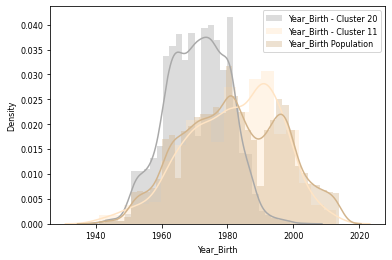

In [95]:
sns.distplot(cluster02['Year_Birth'], color = "darkgrey", label = "Year_Birth - Cluster 20")
sns.distplot(cluster11['Year_Birth'], color = "bisque", label = "Year_Birth - Cluster 11")
sns.distplot(unscaled_data['Year_Birth'], color = "tan", label = "Year_Birth Population")
plt.legend()

In [100]:
df_customer = unscaled_data.copy(deep=True)
df_customer['label'] = unscaled_data['label_cust']

descr = df_customer.reset_index(drop=True)
descr = descr.groupby(['label'])[['Churn', 'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType']].describe().T
descr

label                         0            1            2            3
Churn        count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.619165     0.235311     0.253017     0.777558
             std       0.485646     0.424253     0.434789     0.415955
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     1.000000
             50%       1.000000     0.000000     0.000000     1.000000
             75%       1.000000     0.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Male         count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.621622     0.519160     0.363616     0.439934
             std       0.485037     0.499704     0.481093     0.496461
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     0.000000
             50%       1.000000     1.000000     0.000000     0.000000
             75%       1.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Longevity    count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.999553     0.997162     0.996269     0.061056
             std       0.021134     0.053209     0.060971     0.239473
             min       0.000000     0.000000     0.000000     0.000000
             25%       1.000000     1.000000     1.000000     0.000000
             50%       1.000000     1.000000     1.000000     0.000000
             75%       1.000000     1.000000     1.000000     0.000000
             max       1.000000     1.000000     1.000000     1.000000
Year_Birth   count  4477.000000  3523.000000  4557.000000  3030.000000
             mean   1987.394014  1980.438547  1970.620145  1991.434983
             std      16.368733    12.670769     9.735680    10.728048
             min    1949.000000  1941.000000  1941.000000  1941.000000
             25%    1977.000000  1971.000000  1964.000000  1985.000000
             50%    1988.000000  1980.000000  1971.000000  1995.000000
             75%    2001.000000  1991.000000  1978.000000  1998.000000
             max    2014.000000  2014.000000  2003.000000  2014.000000
TypeTravel   count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      0.197900     0.989498     0.739741     0.993729
             std       0.398461     0.101956     0.438824     0.078952
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     1.000000     0.000000     1.000000
             50%       0.000000     1.000000     1.000000     1.000000
             75%       0.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
RewardPoints count  4477.000000  3523.000000  4557.000000  3030.000000
             mean   4914.155015  3832.715867  6068.616853  4994.711881
             std     613.208159   800.120692   579.122094   563.994541
             min    1825.000000   409.000000  4376.000000  1412.000000
             25%    4592.000000  3314.500000  5529.000000  4702.250000
             50%    5010.000000  3895.000000  6172.000000  5052.500000
             75%    5338.000000  4460.000000  6576.000000  5364.000000
             max    6273.000000  5620.000000  6950.000000  6249.000000
RoomType     count  4477.000000  3523.000000  4557.000000  3030.000000
             mean      1.146080     0.038603     0.457099     0.634653
             std       0.423944     0.192675     0.593878     0.552482
             min       0.000000     0.000000     0.000000     0.000000
             25%       1.000000     0.000000     0.000000     0.000000
             50%       1.000000     0.000000     0.000000     1.000000
             75%       1.000000     0.000000     1.000000     1.000000
             max       2

In [101]:
df_satisfaction = unscaled_data.copy(deep=True)
df_satisfaction['label'] = unscaled_data['label_sat']

descr = df_satisfaction.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  9165.000000  6422.000000
           mean      3.090016     2.487076
           std       1.403243     1.287295
           min       0.000000     0.000000
           25%       2.000000     2.000000
...                       ...          ...
BarService min       1.000000     0.000000
           25%       3.000000     2.000000
           50%       4.000000     3.000000
           75%       5.000000     4.000000
           max       5.000000     5.000000

[112 rows x 2 columns]

In [102]:
df_final = unscaled_data.copy(deep=True)
df_final['label'] = unscaled_data['final_label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Churn', 'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                      00           01           02           03  \
Churn      count  2424.000000  2376.000000  3003.000000  1362.000000   
           mean      0.521452     0.049663     0.088245     0.632159   
           std       0.499643     0.217294     0.283698     0.482395   
           min       0.000000     0.000000     0.000000     0.000000   
           25%       0.000000     0.000000     0.000000     0.000000   
...                       ...          ...          ...          ...   
BarService min       1.000000     1.000000     1.000000     1.000000   
           25%       3.000000     3.000000     3.000000     2.000000   
           50%       4.000000     4.000000     4.000000     3.000000   
           75%       5.000000     5.000000     5.000000     4.000000   
           max       5.000000     5.000000     5.000000     5.000000   

label                      10           11           12           13  
Churn      count  2053.000000  1147.000000  1554.000000  1668.000000  
           mean      0.734535     0.619878     0.571429     0.896283  
           std       0.441688     0.485628     0.495031     0.304985  
           min       0.000000     0.000000     0.000000     0.000000  
           25%       0.000000     0.000000     0.000000     1.000000  
...                       ...          ...          ...          ...  
BarService min       0.000000     0.000000     1.000000     1.000000  
           25%       2.000000     2.000000     2.000000     2.000000  
           50%       3.000000     3.000000     3.000000     3.000000  
           75%       4.000000     4.000000     4.000000     4.000000  
           max       5.000000     5.000000     5.000000     5.000000  

[168 rows x 8 columns]

<h4> Clusters Evaluation for satisfaction perspective</h4>

In [103]:
def silhouette(X, algorithm):
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_scores =[]
    
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    return silhouette_scores

In [104]:
X = data_satisfaction[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.20813093842937452
For n_clusters = 3 The average silhouette_score is : 0.1576461933286787
For n_clusters = 4 The average silhouette_score is : 0.15301357688782724
For n_clusters = 5 The average silhouette_score is : 0.15654582388275423
For n_clusters = 6 The average silhouette_score is : 0.15617298233382476


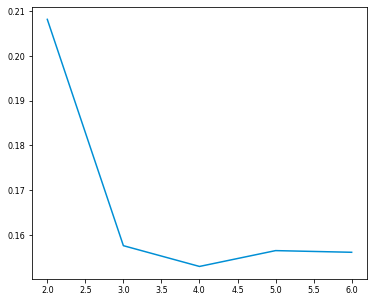

In [105]:
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

draw_silhouette(k_means_silhouette)

In [106]:
hc_silhouette = silhouette(X, AgglomerativeClustering)

For n_clusters = 2 The average silhouette_score is : 0.18312684546971653
For n_clusters = 3 The average silhouette_score is : 0.16518114987466573
For n_clusters = 4 The average silhouette_score is : 0.0968724924306049
For n_clusters = 5 The average silhouette_score is : 0.09599667955993277
For n_clusters = 6 The average silhouette_score is : 0.09618655849499025


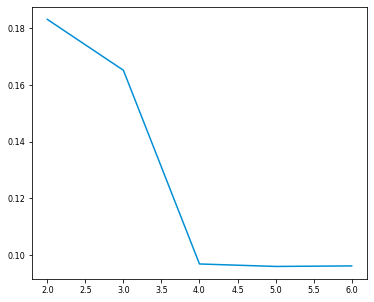

In [107]:
draw_silhouette(hc_silhouette)

<h4>Clusters Evaluation for customer perspective</h4>

In [108]:
X = data_customer[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.19363935493186657
For n_clusters = 3 The average silhouette_score is : 0.21808781887227327
For n_clusters = 4 The average silhouette_score is : 0.23730597804591794
For n_clusters = 5 The average silhouette_score is : 0.23509415383042315
For n_clusters = 6 The average silhouette_score is : 0.2513799795355319


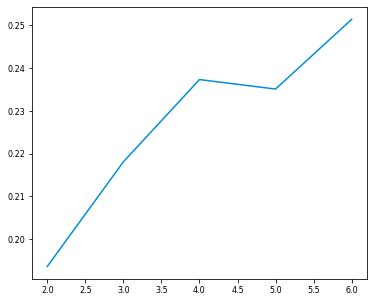

In [109]:
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 7), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

draw_silhouette(k_means_silhouette)